In [1]:
import pandas as pd

LM = pd.read_csv("LM_position.csv")

LM.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,215914,N. Kanté,27,France,89,90,Chelsea,€63M,€225K,Right,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,€121.3M
1,194765,A. Griezmann,27,France,89,90,Atlético Madrid,€78M,€145K,Left,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,€165.8M
2,189511,Sergio Busquets,29,Spain,89,89,FC Barcelona,€51.5M,€315K,Right,...,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,€105.6M
3,200145,Casemiro,26,Brazil,88,90,Real Madrid,€59.5M,€285K,Right,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M
4,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,€73.5M,€205K,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,€141.5M
5,188567,P. Aubameyang,29,Gabon,88,88,Arsenal,€59M,€265K,Right,...,86.0,27.0,25.0,36.0,6.0,9.0,15.0,9.0,9.0,€112.1M
6,208722,S. Mané,26,Senegal,86,87,Liverpool,€52M,€195K,Right,...,80.0,42.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0,€102.7M
7,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,€53M,€195K,Right,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,€104.7M
8,190483,Douglas Costa,27,Brazil,86,86,Juventus,€46.5M,€175K,Left,...,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,€76.7M
9,189596,T. Müller,28,Germany,86,86,FC Bayern München,€45M,€135K,Right,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,€74.3M


In [2]:
LM = LM.drop(['Nationality','Overall','Club','International Reputation','Work Rate','Body Type',
                           'Jersey Number','Joined','Loaned From','Contract Valid Until','GKDiving','GKHandling','GKKicking',
                           'GKPositioning','GKReflexes','Release Clause','Positioning'], axis=1)


LM.head(10)

,ID,Name,Age,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Position,...,Strength,LongShots,Aggression,Interceptions,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,215914,N. Kanté,27,90,€63M,€225K,Right,3.0,2.0,LDM,...,76.0,69.0,90.0,92.0,79.0,54.0,85.0,90.0,91.0,85.0
1,194765,A. Griezmann,27,90,€78M,€145K,Left,3.0,4.0,CAM,...,62.0,82.0,69.0,35.0,83.0,79.0,87.0,59.0,47.0,48.0
2,189511,Sergio Busquets,29,89,€51.5M,€315K,Right,3.0,3.0,CDM,...,77.0,54.0,85.0,87.0,87.0,60.0,90.0,90.0,86.0,80.0
3,200145,Casemiro,26,90,€59.5M,€285K,Right,3.0,2.0,CDM,...,89.0,79.0,87.0,87.0,77.0,66.0,84.0,88.0,90.0,87.0
4,190460,C. Eriksen,26,91,€73.5M,€205K,Right,5.0,4.0,CAM,...,58.0,89.0,46.0,56.0,91.0,67.0,88.0,59.0,57.0,22.0
5,188567,P. Aubameyang,29,88,€59M,€265K,Right,4.0,4.0,LM,...,76.0,79.0,43.0,48.0,77.0,76.0,86.0,27.0,25.0,36.0
6,208722,S. Mané,26,87,€52M,€195K,Right,4.0,4.0,LM,...,67.0,74.0,73.0,35.0,82.0,71.0,80.0,42.0,42.0,38.0
7,201942,Roberto Firmino,26,87,€53M,€195K,Right,4.0,4.0,CAM,...,74.0,76.0,73.0,58.0,85.0,72.0,87.0,60.0,64.0,42.0
8,190483,Douglas Costa,27,86,€46.5M,€175K,Left,3.0,5.0,LM,...,63.0,80.0,55.0,48.0,84.0,77.0,84.0,45.0,38.0,34.0
9,189596,T. Müller,28,86,€45M,€135K,Right,4.0,3.0,CAM,...,68.0,80.0,57.0,58.0,85.0,60.0,83.0,44.0,41.0,44.0


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
LM['Preferred Foot'] =label_encoder.fit_transform(LM['Preferred Foot'])
LM['Position'] =label_encoder.fit_transform(LM['Position'])

def convert_height_to_cm(height):
    try:
        feet, inches = map(int, height.split("'"))
        total_inches = feet * 12 + inches
        height_cm = total_inches * 2.54
        return round(height_cm, 2)
    except Exception as e:
        print(f"Error converting height: {e}")
        return None
    
def convert_weight_to_kg(weight):
    try:
        # Remove 'lbs' from the string and convert to float
        weight_kg = float(weight.replace('lbs', '').strip()) * 0.453592
        return round(weight_kg, 2)
    except Exception as e:
        print(f"Error converting weight: {e}")
        return None

# Applying the conversion functions
LM['Height'] = LM['Height'].apply(convert_height_to_cm)
LM['Weight'] = LM['Weight'].apply(convert_weight_to_kg)

# Function to convert Value and Wage
def convert_value_wage(value):
    if value[-1] == 'M':
        return float(value[1:-1]) * 1e6
    elif value[-1] == 'K':
        return float(value[1:-1]) * 1e3
    return float(value[1:])

# Apply conversion
LM['Value'] = LM['Value'].apply(convert_value_wage).astype(int)
LM['Wage'] = LM['Wage'].apply(convert_value_wage).astype(int)

LM.head(10)

,ID,Name,Age,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Position,...,Strength,LongShots,Aggression,Interceptions,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,215914,N. Kanté,27,90,63000000,225000,1,3.0,2.0,2,...,76.0,69.0,90.0,92.0,79.0,54.0,85.0,90.0,91.0,85.0
1,194765,A. Griezmann,27,90,78000000,145000,0,3.0,4.0,0,...,62.0,82.0,69.0,35.0,83.0,79.0,87.0,59.0,47.0,48.0
2,189511,Sergio Busquets,29,89,51500000,315000,1,3.0,3.0,1,...,77.0,54.0,85.0,87.0,87.0,60.0,90.0,90.0,86.0,80.0
3,200145,Casemiro,26,90,59500000,285000,1,3.0,2.0,1,...,89.0,79.0,87.0,87.0,77.0,66.0,84.0,88.0,90.0,87.0
4,190460,C. Eriksen,26,91,73500000,205000,1,5.0,4.0,0,...,58.0,89.0,46.0,56.0,91.0,67.0,88.0,59.0,57.0,22.0
5,188567,P. Aubameyang,29,88,59000000,265000,1,4.0,4.0,3,...,76.0,79.0,43.0,48.0,77.0,76.0,86.0,27.0,25.0,36.0
6,208722,S. Mané,26,87,52000000,195000,1,4.0,4.0,3,...,67.0,74.0,73.0,35.0,82.0,71.0,80.0,42.0,42.0,38.0
7,201942,Roberto Firmino,26,87,53000000,195000,1,4.0,4.0,0,...,74.0,76.0,73.0,58.0,85.0,72.0,87.0,60.0,64.0,42.0
8,190483,Douglas Costa,27,86,46500000,175000,0,3.0,5.0,3,...,63.0,80.0,55.0,48.0,84.0,77.0,84.0,45.0,38.0,34.0
9,189596,T. Müller,28,86,45000000,135000,1,4.0,3.0,0,...,68.0,80.0,57.0,58.0,85.0,60.0,83.0,44.0,41.0,44.0


In [4]:
LM['Passing'] = LM['Crossing']  +LM['ShortPassing'] +LM['LongPassing']

LM['Ball_Control'] =  LM['Dribbling']  +LM['BallControl'] +LM['Composure'] +LM['HeadingAccuracy'] 

LM['Fitness'] = LM['Acceleration'] +LM['SprintSpeed'] +LM['Agility'] +LM['Reactions'] +LM['Balance'] +LM['Jumping'] +LM['Stamina'] +LM['Strength'] +LM['Aggression'] +LM['Vision']

LM['Defensive_abilities'] =LM['Interceptions'] +LM['Marking']  +LM['StandingTackle']  +LM['SlidingTackle'] 

LM['Shooting'] = LM['Curve'] +LM['FKAccuracy'] +LM['Finishing'] +LM['Penalties'] +LM['LongShots'] 

LM = LM [['ID','Passing','Ball_Control','Value','Fitness','Defensive_abilities','Potential','Weight','Shooting','Age']]
LM.head(10)

,ID,Passing,Ball_Control,Value,Fitness,Defensive_abilities,Potential,Weight,Shooting,Age
0,215914,235.0,298.0,63000000,845.0,358.0,90,72.12,286.0,27
1,194765,241.0,349.0,78000000,820.0,189.0,90,73.03,413.0,27
2,189511,233.0,326.0,51500000,708.0,343.0,89,76.20,315.0,29
3,200145,219.0,307.0,59500000,764.0,352.0,90,83.91,337.0,26
4,190460,267.0,315.0,73500000,733.0,194.0,91,76.20,409.0,26
5,188567,218.0,326.0,59000000,772.0,136.0,88,79.83,397.0,29
6,208722,223.0,315.0,52000000,832.0,157.0,87,68.95,367.0,26
7,201942,233.0,339.0,53000000,805.0,224.0,87,76.20,380.0,26
8,190483,236.0,317.0,46500000,799.0,165.0,86,69.85,386.0,27
9,189596,234.0,322.0,45000000,764.0,187.0,86,74.84,367.0,28


In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from itertools import product
from sklearn.linear_model import Ridge

x = LM.drop(['ID', 'Potential'], axis=1)
y = LM['Potential']

# Now split the cleaned data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [6]:
XGboost_model = xgb.XGBRegressor(objective ='reg:squarederror')

# Hyperparameter grid
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.05],
    'max_depth': [ 7],
    'subsample': [0.6],
    'colsample_bytree': [1.0],
    'reg_alpha': [ 0.1],
    'reg_lambda': [ 1.5]
}

# Grid search with cross-validation
grid_search = GridSearchCV(XGboost_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

# XGboost_model.fit(x_train, y_train)

# Best model from grid search
best_XGboost_model = grid_search.best_estimator_

pred_XGboost_y_test=best_XGboost_model.predict(x_test)
pred_XGboost_y_train=best_XGboost_model.predict(x_train)

print(f'XGBoost Test - {r2_score(y_test,pred_XGboost_y_test)}')
print(f'XGBoost Train - {r2_score(y_train,pred_XGboost_y_train)}')

XGBoost Test - 0.9424653649330139
XGBoost Train - 0.9914023280143738


In [7]:
RandomForest_Model = RandomForestRegressor()
RandomForest_Model.fit(x_train , y_train)

pred_RandomForest_y_test=RandomForest_Model.predict(x_test)
pred_RandomForest_y_train=RandomForest_Model.predict(x_train)

print(f'Test - {r2_score(y_test,pred_RandomForest_y_test)}')
print(f'Train - {r2_score(y_train,pred_RandomForest_y_train)}')

Test - 0.928105230960819
Train - 0.9905634852061882


In [8]:
Ridge_Model = Ridge()
Ridge_Model.fit(x_train, y_train)

pred_Ridge_y_test=Ridge_Model.predict(x_test)
pred_Ridge_y_train=Ridge_Model.predict(x_train)

print(f'Test - {r2_score(y_test,pred_Ridge_y_test)}')
print(f'Train - {r2_score(y_train,pred_Ridge_y_train)}')

Test - 0.7500642579705827
Train - 0.7328561356135399


In [9]:
Combine_test = ((pred_RandomForest_y_test+pred_XGboost_y_test+pred_Ridge_y_test)/3)
Combine_train= ((pred_RandomForest_y_train+pred_XGboost_y_train+pred_Ridge_y_train)/3)

print(f'Test - {r2_score(y_test,Combine_test)}')
print(f'Train - {r2_score(y_train,Combine_train)}')

Test - 0.9198384560341217
Train - 0.9572971292980682


In [10]:
# Create a DataFrame with player ID, actual potential, and predicted potential
result_df = pd.DataFrame({
    'ID': LM['ID'].iloc[x_test.index],
    'Actual_Potential': y_test,
    'Predicted_Potential': Combine_test
})

# Sort by predicted potential in descending order to get the top players
top_players = result_df.sort_values(by='Predicted_Potential', ascending=False).head(10)

# Print the top 10 players
print(top_players)


        ID  Actual_Potential  Predicted_Potential
0   215914                90            89.992767
7   201942                87            89.950262
14  216594                89            89.058012
22  209499                88            88.630804
29  213565                89            88.200120
31  212523                90            88.066825
56  229906                89            87.653276
33  201995                85            87.272000
30  213345                87            87.268783
25  200104                85            87.009900


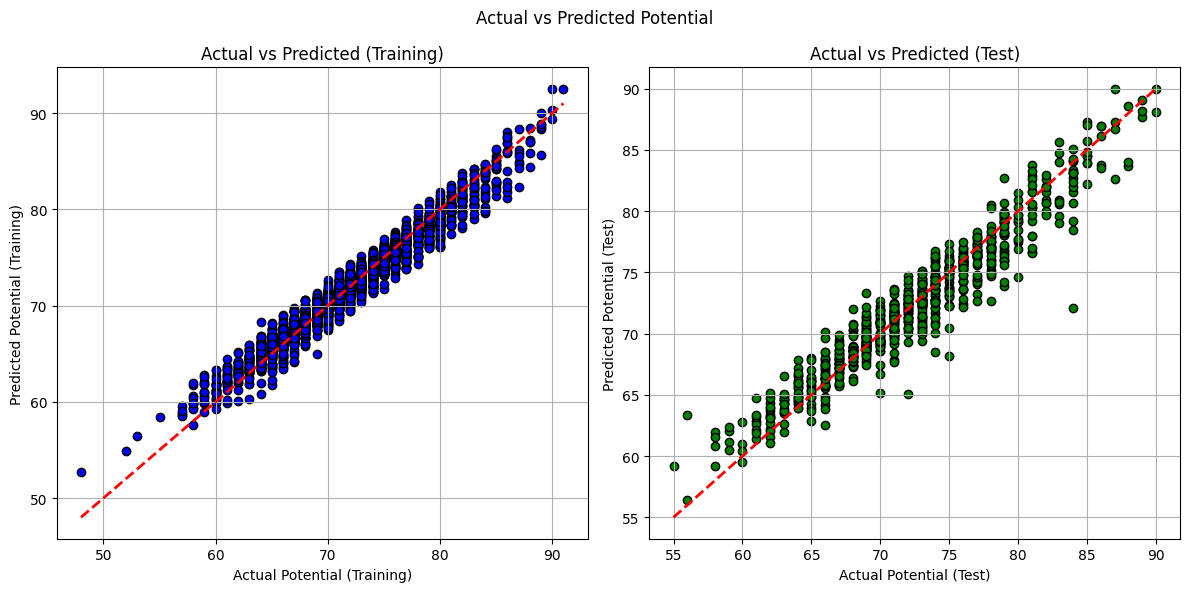

In [11]:
import matplotlib.pyplot as plt

# Plotting for the training and test data
plt.figure(figsize=(12, 6))

# Training plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, Combine_train, color='blue', edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Potential (Training)')
plt.ylabel('Predicted Potential (Training)')
plt.title('Actual vs Predicted (Training)')
plt.grid(True)

# Test plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, Combine_test, color='green', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Potential (Test)')
plt.ylabel('Predicted Potential (Test)')
plt.title('Actual vs Predicted (Test)')
plt.grid(True)

plt.suptitle('Actual vs Predicted Potential')
plt.tight_layout()
plt.show()
